# K-近邻算法（KNN）

K nearest neighbour

## 0、导引

### 如何进行电影分类
众所周知，电影可以按照题材分类，然而题材本身是如何定义的?由谁来判定某部电影属于哪
个题材?也就是说同一题材的电影具有哪些公共特征?这些都是在进行电影分类时必须要考虑的问
题。没有哪个电影人会说自己制作的电影和以前的某部电影类似，但我们确实知道每部电影在风格
上的确有可能会和同题材的电影相近。那么动作片具有哪些共有特征，使得动作片之间非常类似，
而与爱情片存在着明显的差别呢？动作片中也会存在接吻镜头，爱情片中也会存在打斗场景，我们
不能单纯依靠是否存在打斗或者亲吻来判断影片的类型。但是爱情片中的亲吻镜头更多，动作片中
的打斗场景也更频繁，基于此类场景在某部电影中出现的次数可以用来进行电影分类。

本章介绍第一个机器学习算法：K-近邻算法，它非常有效而且易于掌握。

## 1、k-近邻算法原理

简单地说，K-近邻算法采用测量不同特征值之间的距离方法进行分类。

- 优点：精度高、对异常值不敏感、无数据输入假定。
- 缺点：时间复杂度高、空间复杂度高。
- 适用数据范围：数值型和标称型。

### 工作原理

存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输人没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前K个最相似的数据，这就是K-近邻算法中K的出处,通常*K是不大于20的整数。
最后 ，选择K个最相似数据中出现次数最多的分类，作为新数据的分类*。

回到前面电影分类的例子，使用K-近邻算法分类爱情片和动作片。有人曾经统计过很多电影的打斗镜头和接吻镜头，下图显示了6部电影的打斗和接吻次数。假如有一部未看过的电影，如何确定它是爱情片还是动作片呢？我们可以使用K-近邻算法来解决这个问题。

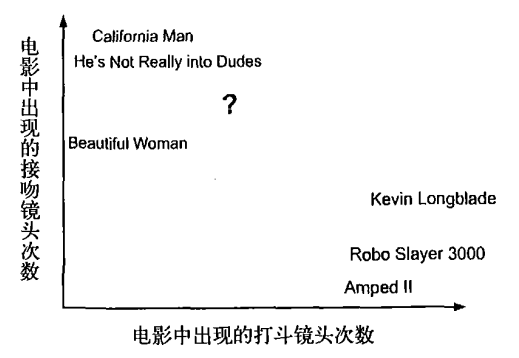

首先我们需要知道这个未知电影存在多少个打斗镜头和接吻镜头，上图中问号位置是该未知电影出现的镜头数图形化展示，具体数字参见下表。

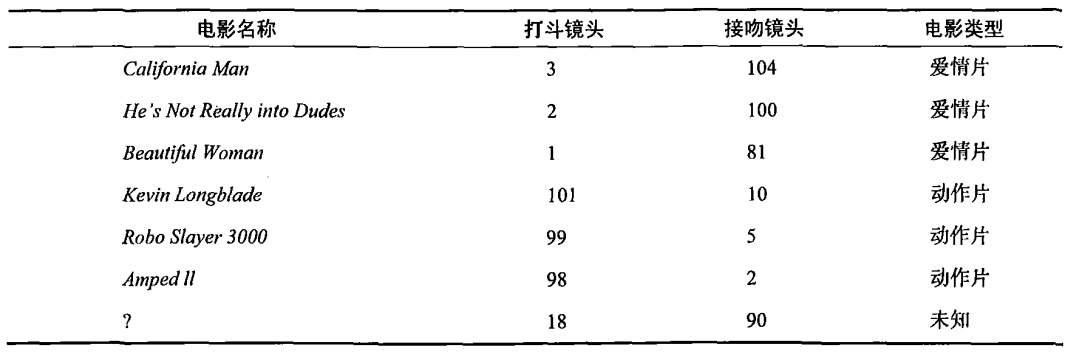

即使不知道未知电影属于哪种类型，我们也可以通过某种方法计算出来。首先计算未知电影与样本集中其他电影的距离，如图所示。

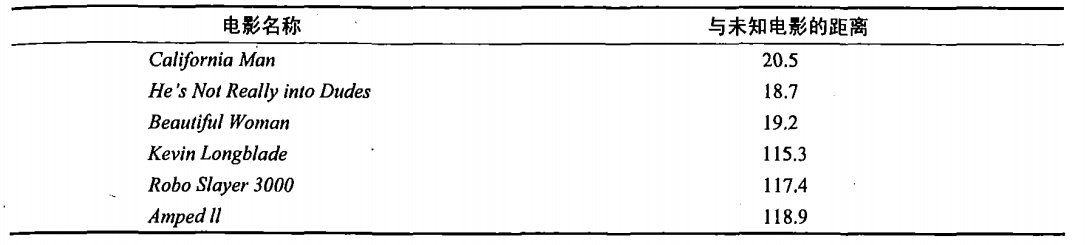

现在我们得到了样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到K个距
离最近的电影。假定k=3，则三个最靠近的电影依次是California Man、He's Not Really into Dudes、Beautiful Woman。K-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

### 欧几里得距离(Euclidean Distance)

欧氏距离是最常见的距离度量，衡量的是多维空间中各个点之间的绝对距离。公式如下：

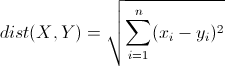

## 2、在scikit-learn库中使用k-近邻算法

- 分类问题：from sklearn.neighbors import KNeighborsClassifier

- 回归问题：from sklearn.neighbors import KNeighborsRegressor

### 0）一个最简单的例子

身高、体重、鞋子尺码数据对应性别

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
import numpy as np

In [4]:
# 首先要有训练数据
X_train = np.array([[180,80,43], [160, 50,37], [175,70,42],[170,55,38], [160,60,40]])
y_labels = np.array(['男', '女','男', '女', '男'])
# 生成knn算法的实例
knn = KNeighborsClassifier()
# 训练
knn.fit(X_train, y_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [5]:
# 预测
# 测试数据
x_test = np.array([[185,85,44]])
knn.predict(x_test)

array(['男'], dtype='<U1')

In [12]:
x_test = np.array([[185,85,44], [155, 45, 35], [170, 65, 41], [165, 70, 38]])
knn.predict(x_test)

array(['男', '男', '男', '男'], dtype='<U1')

### 1）用于分类

导包，机器学习的算法KNN、数据鸢尾花


In [52]:
import sklearn.datasets as datasets

In [53]:
iris = datasets.load_iris()

In [16]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [54]:
data = iris.data
target = iris.target

In [18]:
display(data.shape, target.shape)

(150, 4)

(150,)

In [55]:
# 导入一个数据拆分的包
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(data,target, test_size=0.1)

In [56]:
# 训练
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
# 预测
knn.predict(x_test)

array([1, 1, 0, 2, 0, 2, 2, 2, 0, 1, 0, 2, 1, 0, 0])

In [24]:
y_test

array([1, 1, 0, 2, 0, 2, 2, 2, 0, 1, 0, 2, 1, 0, 0])

In [25]:
knn.score(x_test,y_test)

1.0

In [26]:
knn.score(X_train, y_train)

0.9629629629629629

获取训练样本

绘制图形

定义KNN分类器

第一步，训练数据

第二步预测数据：，所预测的数据，自己创造，就是上面所显示图片的背景点  

生成预测数据

对数据进行预测

显示数据

### 2）用于回归  
回归用于对趋势的预测

导包

生成样本数据

In [27]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [28]:
from pandas import DataFrame

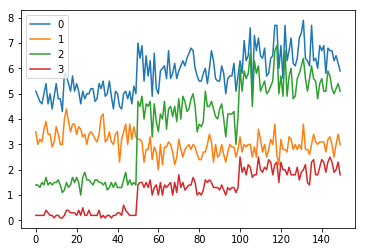

In [30]:
DataFrame(data).plot()

In [31]:
data = data[:, :2]

In [32]:
data.shape

(150, 2)

In [33]:
knn = KNeighborsClassifier()

In [34]:
knn.fit(data, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

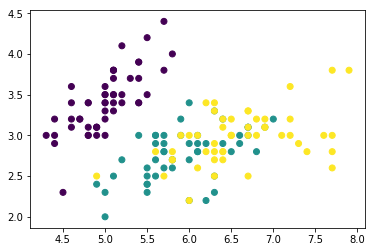

In [36]:
plt.scatter(data[:,0], data[:,1], c=target)

In [57]:
# 预测
# 自己生成预测数据.
x = np.linspace(data[:,0].min(), data[:,0].max(), 1000)
y = np.linspace(data[:,1].min(), data[:,1].max(), 650)
X,Y = np.meshgrid(x,y)
display(X.shape,Y.shape)

(650, 1000)

(650, 1000)

In [58]:
X_ravel = np.ravel(X)
Y_ravel = np.ravel(Y)
display(X_ravel.shape)

(650000,)

In [59]:
# 把x和y连接起来变成一个坐标
x_test = np.c_[X_ravel, Y_ravel]

In [41]:
x_test.shape

(650000, 2)

In [43]:
# 预测
y_test = knn.predict(x_test)

In [46]:
data[:,0].shape

(150,)

In [70]:
plt.pcolormesh(x_test, y_test, c=y_test.reshape(X.shape))
# colors = np.random.rand(150,3)

plt.scatter(data[:,0], data[:,1], c=target ,cmap='rainbow')

ValueError: cannot reshape array of size 15 into shape (650,1000)

In [60]:
display(X.shape,Y.shape)

(650, 1000)

(650, 1000)

In [63]:
display((data[:,0].shape, data[:,1].shape))

((150,), (150,))

In [69]:
y_test.shape

(15,)

ValueError: c of shape (15,) not acceptable as a color sequence for x with size 650000, y with size 650000

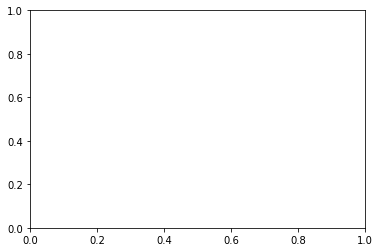

In [67]:
plt.scatter(X_ravel, Y_ravel, c=)
plt.scatter(data[:,0], data[:,1], c=target ,cmap='rainbow')

In [71]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
X_train = np.random.rand(80,1)*10
X_train.shape

(80, 1)

In [73]:
X_train

array([[6.49240169],
       [4.99128249],
       [3.22964905],
       [4.43673213],
       [4.70949104],
       [4.55294192],
       [7.63193915],
       [2.46367998],
       [8.81514865],
       [5.21910442],
       [1.79442018],
       [2.45386093],
       [2.49839056],
       [5.73065452],
       [4.58807411],
       [1.34975897],
       [8.56609165],
       [7.07599533],
       [0.64969581],
       [1.15223908],
       [6.18988979],
       [9.31984151],
       [6.21118888],
       [6.34856315],
       [8.2103455 ],
       [8.97200924],
       [3.73142756],
       [9.86199539],
       [0.28836058],
       [8.8818718 ],
       [9.61120104],
       [8.4236136 ],
       [8.57759875],
       [3.80595378],
       [7.60500351],
       [5.93125959],
       [4.87872443],
       [5.6987285 ],
       [8.99519569],
       [2.02273258],
       [6.18179843],
       [3.79468725],
       [8.09158895],
       [1.80101563],
       [5.23909057],
       [9.32953119],
       [9.97816809],
       [1.429

In [107]:
X_train = np.sort(X_train, axis=0)

y_train = np.sin(X_train)

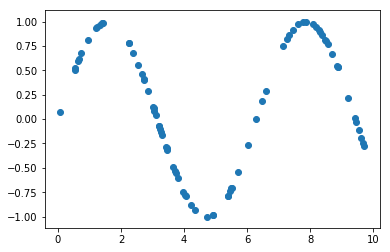

In [108]:
plt.scatter(X_train, y_train)

In [111]:
# 加噪点
y_train[::4,] +=  np.random.randn(20,1)* 0.3

In [95]:
y_train[::4,].shape

(20, 1)

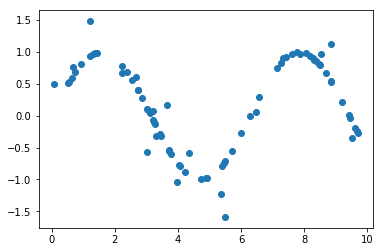

In [112]:
plt.scatter(X_train, y_train)

In [75]:
n = np.array([[1, 0.2], [0.8,2]])
display(n,np.sort(n, axis=1))

array([[1. , 0.2],
       [0.8, 2. ]])

array([[0.2, 1. ],
       [0.8, 2. ]])

In [76]:
display(n,np.sort(n, axis=0))

array([[1. , 0.2],
       [0.8, 2. ]])

array([[0.8, 0.2],
       [1. , 2. ]])

In [113]:
# 训练数据
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [116]:
# 生成测试数据
x_test = np.linspace(0,10, 1000)
# 预测
y_test = knn.predict(x_test.reshape((1000,1)))

In [115]:
x_test.shape

(1000,)

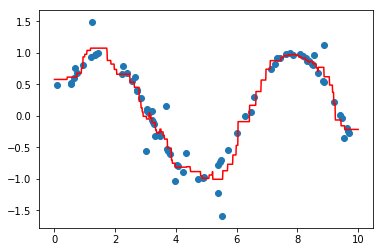

In [118]:
plt.plot(x_test,y_test, c='r')
plt.scatter(X_train, y_train)

生成测试数据的结果

第一步：生成模型，并训练数据

第二步：使用模型，预测数据

绘图显示数据

### 练习
人类动作识别  
步行，上楼，下楼，坐着，站立和躺着  
![](stand-sit-run.jpg)  
数据采集每个人在腰部穿着智能手机，进行了六个活动（步行，上楼，下楼，坐着，站立和躺着）。采用嵌入式加速度计和陀螺仪，以50Hz的恒定速度捕获3轴线性加速度和3轴角速度，来获取数据

导入数据

In [120]:
X_train = np.load('x_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')
y_train = np.load('y_train.npy')
display(X_train.shape, x_test.shape, y_train.shape)

(7352, 561)

(2947, 561)

(7352,)

In [121]:
X_train[:5]

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [ 0.27841883, -0.01641057, -0.12352019, ..., -0.8447876 ,
         0.18028889, -0.05431672],
       [ 0.27965306, -0.01946716, -0.11346169, ..., -0.84893347,
         0.18063731, -0.04911782],
       [ 0.27917394, -0.02620065, -0.12328257, ..., -0.84864938,
         0.18193476, -0.04766318],
       [ 0.27662877, -0.01656965, -0.11536185, ..., -0.84786525,
         0.18515116, -0.04389225]])

In [122]:
# 训练
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [123]:
knn.score(X_train, y_train)

0.9843579978237215

In [124]:
knn.score(x_test, y_test)

0.9015948422124194

In [125]:
y_ = knn.predict(x_test)

In [126]:
display(y_[:10], y_test[:10])

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 4], dtype=int64)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [127]:
from pandas import Series

In [128]:
s = Series(y_train)
s.unique()

array([5, 4, 6, 1, 3, 2], dtype=int64)

获取数据

绘制

In [135]:
label = {1:'WALKING', 2:'WALKING UPSTAIRS', 3:'WALKING DOWNSTAIRS',4:'SITTING', 5:'STANDING', 6:'LAYING'}

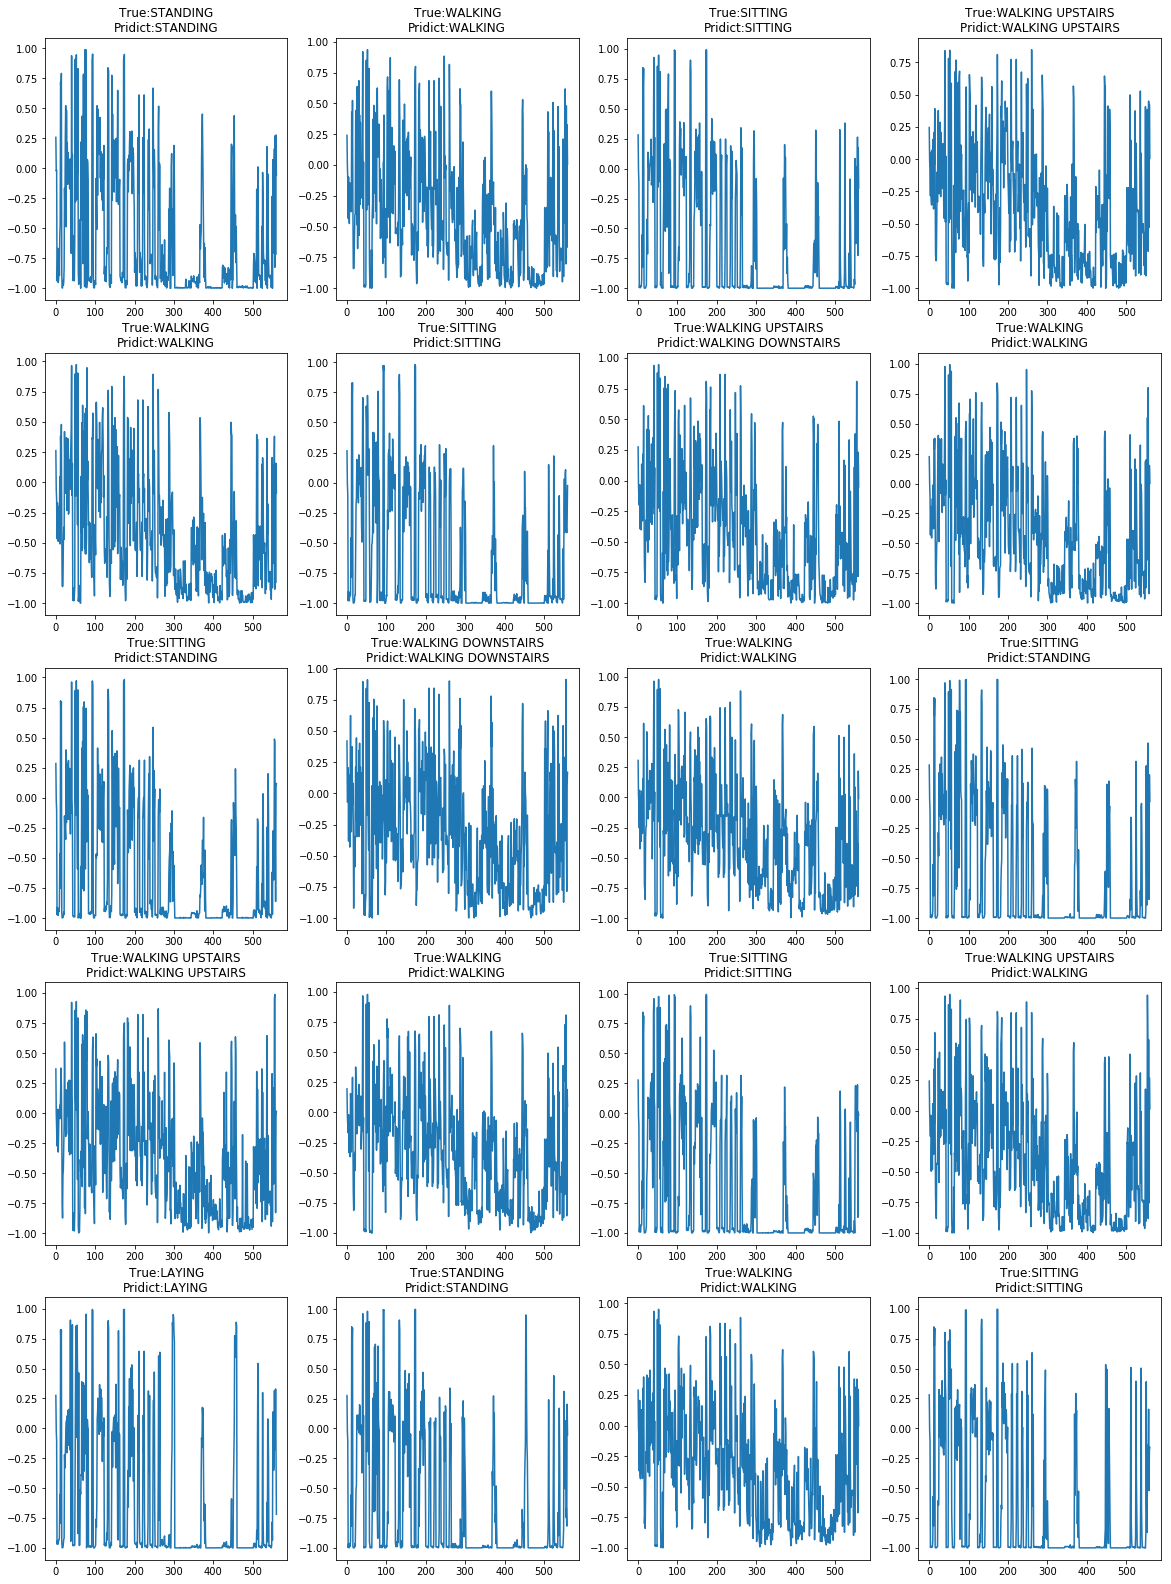

In [136]:
plt.figure(figsize=(4*5, 4*7))
for i in range(20):
    axes = plt.subplot(5,4,i+1)
    # 隔100行取一条数据
    axes.plot(x_test[i*100])
    axes.set_title('True:%s\nPridict:%s' % (label[y_test[i*100]],label[y_[i*100]]))

## 3、作业

#### 1、预测年收入是否大于50K美元

读取adult.txt文件，最后一列是年收入，并使用KNN算法训练模型，然后使用模型预测一个人的年收入是否大于50

In [138]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [169]:
adult = pd.read_csv('adults.txt')
adult.shape

(32561, 15)

In [163]:
adult.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [141]:
adult.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

获取年龄、教育程度、职位、每周工作时间作为机器学习数据  
获取薪水作为对应结果

In [170]:
data = adult[['age', 'workclass', 'education',
       'marital_status', 'occupation', 'race', 'sex',
      'hours_per_week', 'native_country']].copy()
target = adult[['salary']]

数据转换，将String类型数据转换为int

In [145]:
data.dtypes

age                int64
workclass         object
education         object
marital_status    object
occupation        object
race              object
sex               object
hours_per_week     int64
native_country    object
dtype: object

In [165]:
workclass = data['workclass'].unique()

【知识点】map方法，进行数据转换

In [150]:
np.argwhere(workclass == 'State-gov')[0,0]

0

In [149]:
workclass[[0]]

array(['State-gov'], dtype=object)

In [154]:
def convert_workclass(item):
#     workclass = data['workclass'].unique()
    index = np.argwhere(workclass == item)[0,0]
    return index

In [155]:
data['workclass'] = data['workclass'].map(convert_workclass)

In [157]:
data['workclass']

0        0
1        1
2        2
3        2
4        2
5        2
6        2
7        1
8        2
9        2
10       2
11       0
12       2
13       2
14       2
15       2
16       1
17       2
18       2
19       1
20       2
21       2
22       3
23       2
24       2
25       4
26       2
27       5
28       2
29       2
        ..
32531    5
32532    2
32533    2
32534    2
32535    2
32536    2
32537    2
32538    2
32539    5
32540    0
32541    5
32542    5
32543    4
32544    2
32545    4
32546    2
32547    2
32548    1
32549    0
32550    1
32551    2
32552    2
32553    2
32554    2
32555    2
32556    2
32557    2
32558    2
32559    2
32560    6
Name: workclass, Length: 32561, dtype: int64

In [172]:
for column in cols:
    uni = data[column].unique()
    def convert(item):
        index = np.argwhere(uni == item)[0,0]
        return index
    data[column] = data[column].map(convert)

In [173]:
data

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,native_country
0,39,0,0,0,0,0,0,40,0
1,50,1,0,1,1,0,0,13,0
2,38,2,1,2,2,0,0,40,0
3,53,2,2,1,2,1,0,40,0
4,28,2,0,1,3,1,1,40,1
5,37,2,3,1,1,0,1,40,0
6,49,2,4,3,4,1,1,16,2
7,52,1,1,1,1,0,0,45,0
8,31,2,3,0,3,0,1,50,0
9,42,2,0,1,1,0,0,40,0


In [171]:
cols= ['workclass','education','marital_status', 'occupation', 'race', 'sex', 'native_country']

切片：训练数据和预测数据

In [196]:
knn = KNeighborsClassifier(n_neighbors=5)

In [175]:
from sklearn.model_selection import train_test_split

In [225]:
X_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.1)

In [197]:
# 训练
knn.fit(X_train, y_train['salary'].values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [179]:
y_train['salary'].values

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [194]:
y_ = knn.predict(x_test)

In [183]:
display(y_, y_train['salary'].values)

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [198]:
knn.score(X_train, y_train)

0.8451747201747202

In [191]:
knn.score(x_test,y_test)

0.7859993859379797

生成算法

In [216]:
# 归一化,把数据全部转换为0到1之间的数,有利于减小误差,提高准确度.
def func(x):
#     print(x)
    return (x-min(x))/(max(x)-min(x))

In [201]:
X_train.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation', 'race',
       'sex', 'hours_per_week', 'native_country'],
      dtype='object')

In [213]:
cols = ['age', 'workclass', 'education', 'marital_status', 'occupation', 'race',
       'sex', 'hours_per_week', 'native_country']

In [217]:
data[cols] = data[cols].transform(func)

In [218]:
data.head()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,native_country
0,0.301370,0.000,0.000000,0.000000,0.000000,0.00,0.0,0.397959,0.00000
1,0.452055,0.125,0.000000,0.166667,0.071429,0.00,0.0,0.122449,0.00000
2,0.287671,0.250,0.066667,0.333333,0.142857,0.00,0.0,0.397959,0.00000
3,0.493151,0.250,0.133333,0.166667,0.142857,0.25,0.0,0.397959,0.00000
4,0.150685,0.250,0.000000,0.166667,0.214286,0.25,1.0,0.397959,0.02439


第一步：训练数据

In [219]:
knn = KNeighborsClassifier()
knn.fit(data,target)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

第二步：预测数据

In [220]:
knn.score(data, target)

0.8676023463652837

保存训练模型  
from sklearn.externals import joblib

In [221]:
from sklearn.externals import joblib

In [222]:
joblib.dump(knn, 'knn.plk')

['knn.plk']

In [223]:
knn = joblib.load('knn.plk')

In [224]:
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

In [226]:
knn.predict(x_test)

array(['>50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [228]:
knn.score(x_test,y_test)

0.8765735339269266

In [227]:
y_test

,salary
5568,>50K
27439,>50K
32306,<=50K
9550,<=50K
31535,<=50K
16278,<=50K
1576,<=50K
12856,<=50K
10471,<=50K
11123,<=50K


#### 2、小麦种类预测

读取seeds.tsv文件，最后一列是小麦品种，其他列是小麦特征

#### 3、改进约会网站的匹配效果

读取datingTestSet.txt文件，最后一列是喜欢程度。模型：根据前几列的信息，预测喜欢程度